In [1]:
import numpy as np
import math

In [2]:
def getLatLonFromXYZ_Ellipsoid(x, y, z, location= None, true_coords=None):
    # x = float(4333216) #in meters
    # y = float(3193635) #in meters
    # z = float(3375365) #in meters

    a = 6378137.0 #in meters
    b = 6356752.314245 #in meters
    
    # Convert from range [-0.5 0.5] to plus/minus earth radius and switch y with z in the formula
    x = 2 * x * a
    tmp = 2 * y * b
    y = 2 * z * a
    z = tmp
    #print(f'X is {x:.2f}, Y is {y:.2f}, Z is {z:.2f}, ')

    f = (a - b) / a
    f_inv = 1.0 / f

    e_sq = f * (2 - f)                       
    eps = e_sq / (1.0 - e_sq)

    p = math.sqrt(x * x + y * y)
    q = math.atan2((z * a), (p * b))

    sin_q = math.sin(q)
    cos_q = math.cos(q)

    sin_q_3 = sin_q * sin_q * sin_q
    cos_q_3 = cos_q * cos_q * cos_q

    phi = math.atan2((z + eps * b * sin_q_3), (p - e_sq * a * cos_q_3))
    lam = math.atan2(y, x)

    v = a / math.sqrt(1.0 - e_sq * math.sin(phi) * math.sin(phi))
    h   = (p / math.cos(phi)) - v

    lat = math.degrees(phi)
    lon = math.degrees(lam)
    if location is not None:
        print(f'Location is {location}. ', end='')
    if true_coords is not None:
        print(f'Coords calculated: ({lat:.2f}, {lon:.2f}), real ones: {true_coords}')
    else: 
        print(f'Latitude is {lat:.2f}, longitude is {lon:.2f} and height is {h:.2f}')
    print('')

    return (lat,lon,h)

In [3]:
getLatLonFromXYZ_Ellipsoid(0.32874739170074463, 0.36837705969810486, 0.078888900578022)

Latitude is 47.55, longitude is 13.49 and height is -0.45



(47.551495051361876, 13.494007319887505, -0.45461575221270323)

In [4]:
### THIS DOES NOT WORK WITH DATA FROM UNITY
def getLatLonFromXYZ_WRONG(x, y, z):
    R = 6371
    if np.abs(z) < 1:
        lat = np.degrees(np.arcsin(z))
    else:
        lat = np.degrees(np.arcsin(z/R))
    lon = np.degrees(np.arctan2(y, x))
    print(f'METHOD 1: Latitude is {lat:.2f} and longitude is {lon:.2f}')
    return (lat, lon)

In [5]:
def getLatLonFromXYZ(x, y, z, location= None, true_coords=None):
    R = 6371
    # Make x, y, z between -1 and 1
    x, y, z = 2*x, 2*y, 2*z
    if np.abs(y) < 1:
        lat = np.degrees(np.arcsin(y))
    else:
        print('WHAAAAAAAT')
        lat = np.degrees(np.arcsin(y/R))
    lon = np.degrees(np.arctan2(z, x))
    if location is not None:
        print(f'Location is {location}. ', end='')
    if true_coords is not None:
        print(f'Coords calculated: ({lat:.2f}, {lon:.2f}), real ones: {true_coords}')
    else: 
        print(f'Latitude is {lat:.2f} and longitude is {lon:.2f}')
    return (lat, lon)

In [6]:
app_data = {'Ciudad del Vaticano': (0.32874739170074463, 0.36837705969810486, 0.078888900578022, 41.90, 12.45),
                'Andorra': (0.3294089436531067, 0.37592974305152893, 0.012906470336019993, 42.55, 1.58),
                'Liechtenstein': (0.28662389516830444, 0.4061388075351715, 0.05383344739675522, 47.15, 9.55),
                'Malta': (0.3792867958545685, 0.3107946217060089, 0.09771478921175003, 35.91, 14,40),
                'Singapur': (-0.1237204298377037, 0.018398910760879517, 0.4841022491455078, 1.28, 103.83),
                'Maldivas': (0.12785454094409943, 0.05079265311360359, 0.48070088028907776, 4.18, 73.51),
                'Dominica': (0.23213718831539154, 0.12587280571460724, -0.42458024621009827, 15.24, -61.31),
                'Suazilandia': (0.37622836232185364, -0.23933467268943787, 0.2262108027935028, -26.50, 31.50),
                'Islas Marshall': (-0.4969841241836548, 0.004003750625997782, 0.05469045415520668, 9.82, 169.29),
                'Tuvalu': (-0.4970611035823822, -0.012072750367224217, 0.05277114361524582, -8.52, 179.20)}

In [7]:
y = []
sphere_l = []
ellipsoid_l = []
true_l = []
for l, c in app_data.items():
    #print(f'{l} - {c}')
    lat_1, _ = getLatLonFromXYZ(c[0], c[1], c[2], l, (c[3], c[4]))
    lat_2, _, _ = getLatLonFromXYZ_Ellipsoid(c[0], c[1], c[2], l, (c[3], c[4]))
    y.append(c[1])
    sphere_l.append(lat_1)
    ellipsoid_l.append(lat_2)
    true_l.append(c[3])

Location is Ciudad del Vaticano. Coords calculated: (47.46, 13.49), real ones: (41.9, 12.45)
Location is Ciudad del Vaticano. Coords calculated: (47.55, 13.49), real ones: (41.9, 12.45)

Location is Andorra. Coords calculated: (48.75, 2.24), real ones: (42.55, 1.58)
Location is Andorra. Coords calculated: (48.85, 2.24), real ones: (42.55, 1.58)

Location is Liechtenstein. Coords calculated: (54.32, 10.64), real ones: (47.15, 9.55)
Location is Liechtenstein. Coords calculated: (54.41, 10.64), real ones: (47.15, 9.55)

Location is Malta. Coords calculated: (38.43, 14.45), real ones: (35.91, 14)
Location is Malta. Coords calculated: (38.53, 14.45), real ones: (35.91, 14)

Location is Singapur. Coords calculated: (2.11, 104.34), real ones: (1.28, 103.83)
Location is Singapur. Coords calculated: (2.12, 104.34), real ones: (1.28, 103.83)

Location is Maldivas. Coords calculated: (5.83, 75.11), real ones: (4.18, 73.51)
Location is Maldivas. Coords calculated: (5.85, 75.11), real ones: (4.18, 

In [8]:
# Vamos a preparar una interpolación polinomial
from numpy.polynomial.polynomial import polyfit

X = np.array([0.36837705969810486,  0.37592974305152893, 0.4061388075351715, 0.3107946217060089,
              0.018398910760879517, 0.05079265311360359, 0.12587280571460724, -0.23933467268943787, 0.5, -0.5, -0.36837705969810486, 
              -0.37592974305152893, -0.4061388075351715, -0.3107946217060089,
              -0.018398910760879517, -0.05079265311360359, -0.12587280571460724, 0.23933467268943787])
lat = np.array([41.90, 42.55, 47.15, 35.91, 1.28, 4.18, 15.24, -26.50, 90, -90, -41.90, -42.55, -47.15, -35.91, -1.28, -4.18, -15.24, 26.50])

cubic_poly = polyfit(X, lat, 3)
quartic_poly = polyfit(X, lat, 4)
six_poly = polyfit(X, lat, 6)
eight_poly = polyfit(X, lat, 8)
print(eight_poly)


[-2.63412187e-14  1.04213553e+02  2.74675557e-12  4.39639669e+02
 -4.31096090e-11 -5.40378796e+03  2.17504339e-10  1.94274431e+04
 -3.55448336e-10]


Si quisieramos utilizar este polinomio de grado 8 para hacer la estimación de la latitud en Javascript, Chat GPT sugiere hacer algo así:

```javascript
function polyval(coefficients, x) {
  return coefficients.reduce(function(total, coefficient, i) {
    return total + coefficient * Math.pow(x, coefficients.length - i - 1);
  }, 0);
}
```

Y por ejemplo, si queremos calcular la latitud de 5 puntos se puede hacer algo así:

```javascript
let points = [0.1, 0.2, 0.3, 0.4, 0.5]
let coeffs = [-2.63412187e-14  1.04213553e+02  2.74675557e-12  4.39639669e+02
 -4.31096090e-11 -5.40378796e+03  2.17504339e-10  1.94274431e+04 -3.55448336e-10]
let latitudes = points.map(x => polyval(coeffs, x))
console.log(latitudes)
```

Se trata de una aproximación polinomial de grado 8, así que muy alta... y funciona estrictamente solo en el intervalo [-0.5, 0.5] prqué luego se dispararía. En la celda de abajo he dibujado también otra aproximación, una función arcsin escalada. Hace un fit algo mejor que el arcsin normal (que debería ser la función **correcta** en caso de modelo de tierra esférico) pero obviamente cerca de los polos falla. 

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)

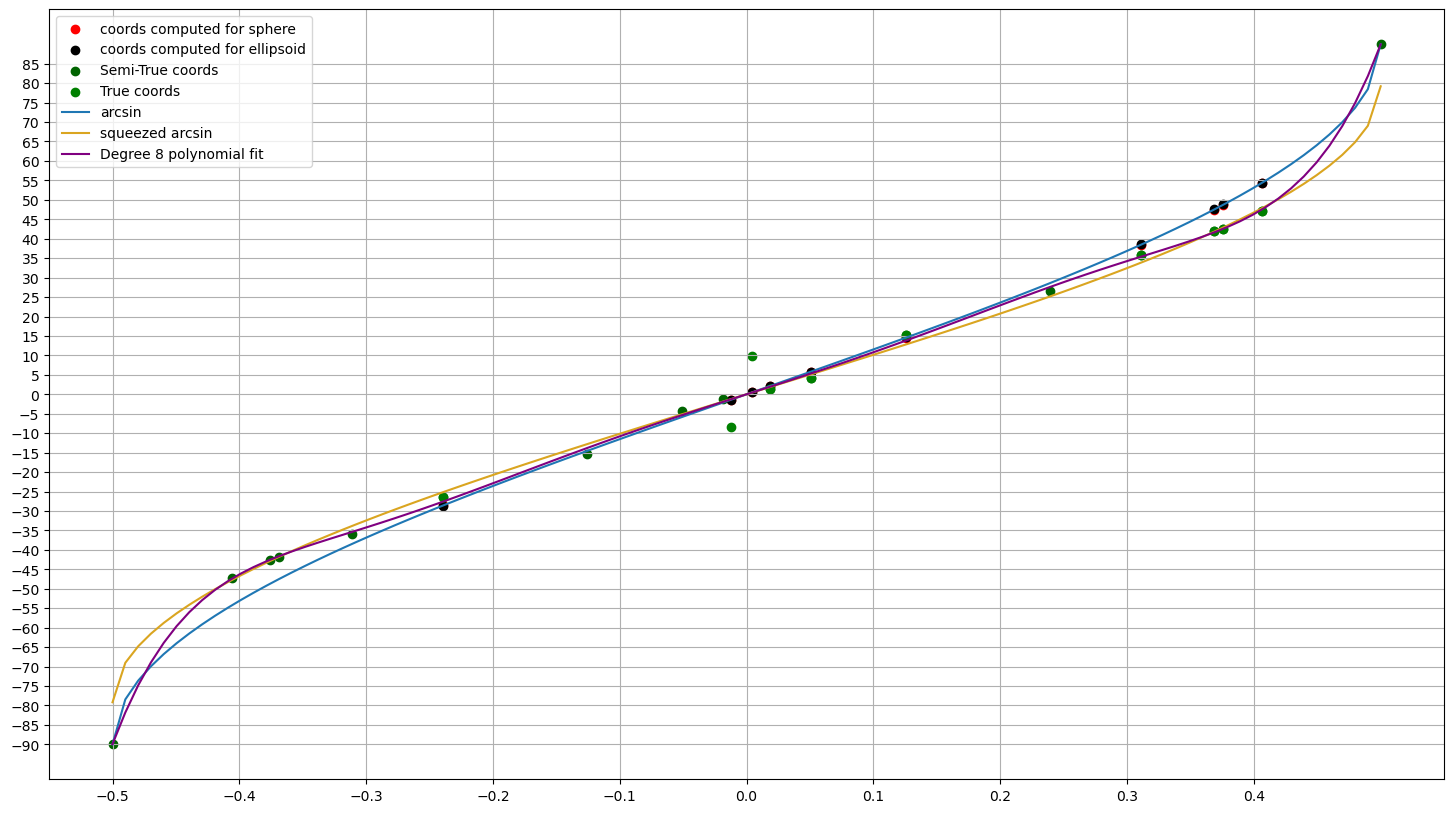

In [11]:
from numpy.polynomial.polynomial import polyval

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(-0.5, 0.5, 0.1))
ax.set_yticks(np.arange(-90, 90, 5))
x = np.linspace(-0.5, 0.5, 100)
asin = np.degrees(np.arcsin(2*x))
asin_sq = 0.88*asin
plt.scatter(y, sphere_l, c='r', label="coords computed for sphere")
plt.scatter(y, ellipsoid_l, c='k', label="coords computed for ellipsoid")
plt.scatter(X, lat, c='darkgreen', label="Semi-True coords")
plt.scatter(y, true_l, c='g', label="True coords")

plt.plot(x, asin, label="arcsin")
plt.plot(x, asin_sq, c='goldenrod', label="squeezed arcsin")
#plt.plot(x, polyval(x, cubic_poly), c="indigo", label="Cubic polynomial fit")
#plt.plot(x, polyval(x, quartic_poly), c="springgreen", label="Degree 4 polynomial fit")
#plt.plot(x, polyval(x, six_poly), c="dimgrey", label="Degree 6 polynomial fit")
plt.plot(x, polyval(x, eight_poly), c="purple", label="Degree 8 polynomial fit")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [11]:
# north pole 1
(x, y, z) = (0.0011845998233184218, 0.499982088804245, 0.004069805145263672)
lat, lon = getLatLonFromXYZ(x, y, z)

Latitude is 89.52 and longitude is 73.77


In [12]:
# north pole 2
(x, y, z) = (-0.0003104, 0.49998098, -0.0043385368)
lat, lon = getLatLonFromXYZ(x, y, z)

Latitude is 89.50 and longitude is -94.09


In [13]:
#londres (lon should be close to 0, lat 51 deg)
(x, y, z) = (0.248966246843338, 0.4336073696613312, -0.0007191513432189822)
lat, lon = getLatLonFromXYZ(x, y, z)

Latitude is 60.14 and longitude is -0.17


In [14]:
#Ecuador (Lat should be close to 0, Lon -78)
(x, y, z) = (0.10038748383522034, 0.01977699249982834, -0.48941925168037415)
lat, lon = getLatLonFromXYZ(x, y, z)

Latitude is 2.27 and longitude is -78.41


In [15]:
#South pole (Lat close to -90)
(x, y, z) = (-0.014206022024154663, -0.49979543685913086, 0.0017421586671844125)
lat, lon = getLatLonFromXYZ(x, y, z)

Latitude is -88.36 and longitude is 173.01
